# PROJECT 

# EMPL

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics

In [23]:
data=pd.read_csv("empl.csv")
data.head()

,SNo,Name,Age,City,Salary
0,1,Tom,28.0,Toronto,20000.0
1,2,Lee,31.0,Edmonto,3900.0
2,3,Dave,34.0,Toronto,8000.0
3,4,Anik,26.0,HongKong,66672.0
4,5,kamal,30.0,BayArea,34344.0


In [24]:
data.dtypes

SNo         int64
Name       object
Age       float64
City       object
Salary    float64
dtype: object

In [25]:
data.isnull().sum()

SNo       0
Name      0
Age       1
City      0
Salary    1
dtype: int64

In [26]:
data.describe()

,SNo,Age,Salary
count,18.000000,17.000000,17.000000
mean,10.000000,32.117647,33705.058824
std,5.790459,7.865132,24554.462953
min,1.000000,22.000000,3900.000000
25%,5.250000,27.000000,8888.000000
50%,10.000000,30.000000,30007.000000
75%,14.750000,38.000000,54666.000000
max,19.000000,50.000000,67666.000000


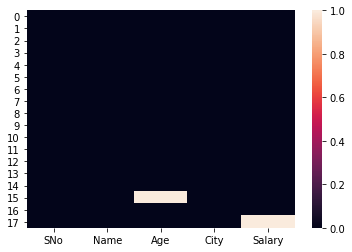

In [27]:
sns.heatmap(data.isnull())

In [28]:
Age_mean=data["Age"].mean()
Age_mean

32.11764705882353

In [29]:
data["Age"]=data["Age"].fillna(value=Age_mean)
data["Age"]

0     28.000000
1     31.000000
2     34.000000
3     26.000000
4     30.000000
5     22.000000
6     43.000000
7     38.000000
8     50.000000
9     27.000000
10    26.000000
11    30.000000
12    22.000000
13    43.000000
14    38.000000
15    32.117647
16    27.000000
17    31.000000
Name: Age, dtype: float64

In [30]:
Salary_mean=data["Salary"].mean()
Salary_mean

33705.05882352941

In [31]:
data["Salary"]=data["Salary"].fillna(value=Salary_mean)
data["Salary"]

0     20000.000000
1      3900.000000
2      8000.000000
3     66672.000000
4     34344.000000
5     30007.000000
6      8300.000000
7     54666.000000
8     67666.000000
9      8888.000000
10    66672.000000
11    34344.000000
12    30007.000000
13     8300.000000
14    54666.000000
15    67666.000000
16     8888.000000
17    33705.058824
Name: Salary, dtype: float64

In [32]:
data=data.drop(["Name"],axis=1)


In [33]:
data=data.drop(["SNo"],axis=1)

In [34]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(strategy="most_frequent")
data["City"]=imp.fit_transform(data["City"].values.reshape(-1,1))
data

,Age,City,Salary
0,28.000000,Toronto,20000.000000
1,31.000000,Edmonto,3900.000000
2,34.000000,Toronto,8000.000000
3,26.000000,HongKong,66672.000000
4,30.000000,BayArea,34344.000000
5,22.000000,HongKong,30007.000000
6,43.000000,BayArea,8300.000000
7,38.000000,Hyderabad,54666.000000
8,50.000000,newyork,67666.000000
9,27.000000,newyork,8888.000000


In [35]:
le=LabelEncoder()
list=["City"]
for val in list:
    data[val]=le.fit_transform(data[val].astype(str))

In [36]:
data

,Age,City,Salary
0,28.000000,4,20000.000000
1,31.000000,1,3900.000000
2,34.000000,4,8000.000000
3,26.000000,2,66672.000000
4,30.000000,0,34344.000000
5,22.000000,2,30007.000000
6,43.000000,0,8300.000000
7,38.000000,3,54666.000000
8,50.000000,5,67666.000000
9,27.000000,5,8888.000000


In [37]:
x=data.iloc[:,0:2]
x

,Age,City
0,28.000000,4
1,31.000000,1
2,34.000000,4
3,26.000000,2
4,30.000000,0
5,22.000000,2
6,43.000000,0
7,38.000000,3
8,50.000000,5
9,27.000000,5


In [38]:
y=data.iloc[:,-1]
y

0     20000.000000
1      3900.000000
2      8000.000000
3     66672.000000
4     34344.000000
5     30007.000000
6      8300.000000
7     54666.000000
8     67666.000000
9      8888.000000
10    66672.000000
11    34344.000000
12    30007.000000
13     8300.000000
14    54666.000000
15    67666.000000
16     8888.000000
17    33705.058824
Name: Salary, dtype: float64

In [39]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.21,random_state=42)

In [42]:
lm=LinearRegression()

In [43]:
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [44]:
lm.intercept_

62092.26348500178

In [45]:
lm.coef_

array([-855.37853555,  -53.71224394])

In [46]:
lm.score(x_train,y_train)

0.05376140345817893

In [47]:
pred=lm.predict(x_test)
pred

array([37926.81551381, 35521.81663896, 19054.77548773, 43166.51121499])

In [48]:
data=pd.DataFrame({"Actual":y_test,"Predicted":pred})
data

,Actual,Predicted
0,20000.0,37926.815514
1,3900.0,35521.816639
8,67666.0,19054.775488
5,30007.0,43166.511215


In [49]:
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test,pred))
print("Mean Squared Error:", metrics.mean_squared_error(y_test,pred))
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_test,pred)))

Mean Absolute Error: 27829.841970006426
Mean Squared Error: 964383471.5034171
Root Mean Squared Error: 31054.524171260735
